# Assignment \#3 - K-means Clustering & SVM  
## 0813366 黃柏翔


# K-means  
confusion matrix is shown below

In [34]:
import re
import pandas as pd
import numpy as np

df = pd.read_csv('seeds_dataset.txt',sep = '\t+', names=[], engine='python')

# drop labels

all_data = df.values
np.random.shuffle(all_data)
true_label = all_data[:,-1]
data =all_data[:,:-1]



In [35]:
def kmeans(X, num_clusters):


  np.random.seed(127)

  cluster_indices = np.zeros(X.shape[0],dtype='i')

  # random cluster
   
  ub = np.max(X,axis = 0)
  lb = np.min(X,axis = 0)
  pre_clusters = clusters = np.random.uniform(lb,ub,size = (num_clusters,X.shape[1]))
  #print(pre_clusters)

  while True:
    min_distance_cluster = 0
    tmp = float("inf")
    for i in range(X.shape[0]):
      tmp = float("inf")
      for c in range(num_clusters):
        #print(np.power(X[i] - clusters[c],2).shape)
        dis = np.mean(((X[i] - clusters[c])**2).sum(axis=0))        
        if dis<tmp:
          tmp = dis
          min_distance_cluster = c
      cluster_indices[i] = int(min_distance_cluster)

    total = np.zeros([num_clusters, X.shape[1]])
    count = np.zeros([num_clusters])
    #print(cluster_indices)
    for x, c in zip(X, cluster_indices):
      #print(type(c))
      total[c] += x
      count[c] += 1

    count[count == 0] = 1 # avoid zero division when there is nothing in a cluster
    clusters = total / count[:, np.newaxis]


    if (pre_clusters == clusters).all():
      return cluster_indices, clusters
    
    pre_clusters = clusters


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred_label, centers = kmeans(data,3)

print('confusion matrix\n\n',confusion_matrix(true_label,pred_label+1))
print(classification_report(true_label,pred_label+1,digits = 4, target_names=['Kama','Rosa','Canadian']))


confusion matrix

 [[60  1  9]
 [10 60  0]
 [ 2  0 68]]
              precision    recall  f1-score   support

        Kama     0.8333    0.8571    0.8451        70
        Rosa     0.9836    0.8571    0.9160        70
    Canadian     0.8831    0.9714    0.9252        70

    accuracy                         0.8952       210
   macro avg     0.9000    0.8952    0.8954       210
weighted avg     0.9000    0.8952    0.8954       210



## Q1.
### Choose two features to execute your K-means function and draw a scatter plot with the computed centers and the predicted label for each instance.

I chose the length of kernel and the area as two features in the graph here.

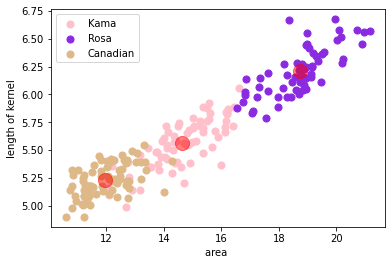

In [37]:
import matplotlib.pyplot as plt

Kama = np.array([data[i]  for i,l in enumerate(pred_label) if l == 0])
Rosa = np.array([data[i]  for i,l in enumerate(pred_label) if l == 1])
Canadian = np.array([data[i]  for i,l in enumerate(pred_label) if l == 2])

plt.scatter(Kama[:,0], Kama[:,3], c='pink', s=50, label = 'Kama')
plt.scatter(Rosa[:,0], Rosa[:,3], c='blueviolet', s=50,label = 'Rosa' )
plt.scatter(Canadian[:,0], Canadian[:,3], c='burlywood', s=50,label = 'Canadian' )
plt.scatter(centers[:, 0], centers[:, 3], c='red', s=200, alpha=0.5)
plt.xlabel('area ')
plt.ylabel('length of kernel')
plt.legend()

# SVM

In [38]:
# Holdout validation with the ratio of 7:3

df = pd.read_csv('ionosphere.data',sep = ',',header=None)
df = df.sample(frac=1) # shuffle

split =  int(len(df.index)*7/10)

train_X = df.iloc[:split,:-1]
test_X = df.iloc[split:,:-1]

train_y = df.iloc[:split,-1]
test_y = df.iloc[split:,-1]



## - linear kernel

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel='linear')
clf.fit(train_X,train_y)

grid_predictions = clf.predict(test_X)
print('confusion matrix\n\n',confusion_matrix(test_y,grid_predictions))
print(classification_report(test_y,grid_predictions,digits = 4))#Output

confusion matrix

 [[25 13]
 [ 2 66]]
              precision    recall  f1-score   support

           b     0.9259    0.6579    0.7692        38
           g     0.8354    0.9706    0.8980        68

    accuracy                         0.8585       106
   macro avg     0.8807    0.8142    0.8336       106
weighted avg     0.8679    0.8585    0.8518       106



## - polynomial kernel

可以看見在GridSearchCV()中，已經有做 5-hold validation  
cv_results_中的 split*N*_test_score, *N* 表示第幾個fold  


In [44]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

parameters = {'kernel': ['poly'],
                'degree': [3,9,27],
                'gamma': [1, 10, 100],
                'coef0': [1,10,100]
                }

clf = GridSearchCV(SVC(max_iter = 100000), parameters)
clf.fit(train_X,train_y)

print('Best estimator: ',clf.best_estimator_,'\n')
print('Results:')
clf.cv_results_

Best estimator:  SVC(coef0=1, gamma=1, kernel='poly', max_iter=100000) 

Results:


{'mean_fit_time': array([0.00462799, 0.00370727, 0.0032773 , 0.00292788, 0.00298014,
        0.0031909 , 0.00309906, 0.00210533, 0.00398445, 0.0034389 ,
        0.00363202, 0.00359001, 0.00299201, 0.0033875 , 0.00335584,
        0.02397079, 0.00180726, 0.00210028, 0.00431461, 0.00353675,
        0.00280523, 0.00353832, 0.00272489, 0.00451269, 0.00180149,
        0.00160255, 0.00195847]),
 'std_fit_time': array([1.21054783e-03, 6.22559342e-04, 3.65150302e-04, 5.09858711e-04,
        9.33018142e-06, 3.98799803e-04, 4.90585067e-04, 2.22875983e-04,
        3.51668064e-03, 3.85215766e-04, 6.24052010e-04, 4.88548550e-04,
        2.43140197e-07, 4.86932588e-04, 4.46897107e-04, 3.86768773e-03,
        4.05482015e-04, 6.64794241e-04, 4.11627185e-04, 4.54899285e-04,
        3.86990386e-04, 4.32211350e-04, 3.83298069e-04, 2.24733548e-03,
        4.03140593e-04, 4.93592419e-04, 7.92309959e-05]),
 'mean_score_time': array([0.0019927 , 0.00159702, 0.00161719, 0.00199032, 0.00180335,
        0.001604

# Q2  
Show the average performance of K-fold cross-validation of parameter search in tables for each kernel.

## - coef0 = 1 , mean_test_score

|gamma\degree|**3**|9|27
|:------:|:------:|:------:|:------:|
|**1**   |**0.8939**|0.8612|0.7673|
|10 |0.8898|0.8653|0.6408|
|100|0.8571|0.8612|0.6408|
  
## - coef0 = 10 , mean_test_score

|gamma\degree|3|9|27
|:------:|:------:|:------:|:------:|
|1   |0.8653|0.8612|0.7020|
|10 |0.8939|0.8612|0.6408|
|100|0.8898|0.8653|0.6408|
  
## - coef0 = 100 , mean_test_score

|gamma\degree|3|9|27
|:------:|:------:|:------:|:------:|
|1   |0.8612|0.8653|0.6408|
|10 |0.8653|0.8612|0.6408|
|100|0.8939|0.8612|0.6408|

GridSearchCV() 預設 **refit = True**  

所以predict時已經是用最佳的參數

In [45]:
grid_predictions = clf.predict(test_X)

print('confusion matrix\n\n',confusion_matrix(test_y,grid_predictions))
print(classification_report(test_y,grid_predictions,digits = 4))#Output

confusion matrix

 [[30  8]
 [ 6 62]]
              precision    recall  f1-score   support

           b     0.8333    0.7895    0.8108        38
           g     0.8857    0.9118    0.8986        68

    accuracy                         0.8679       106
   macro avg     0.8595    0.8506    0.8547       106
weighted avg     0.8669    0.8679    0.8671       106



## - RBF kernel

可以看見在GridSearchCV()中，已經有做 5-hold validation  
cv_results_中的 split*N*_test_score, *N* 表示第幾個fold  


In [46]:
parameters = {'kernel': ['rbf'],
                'gamma': [1, 10, 100],
                }

clf = GridSearchCV(SVC(), parameters)
clf.fit(train_X,train_y)

print('Best estimator: ',clf.best_estimator_,'\n')
print('Results:')
clf.cv_results_

Best estimator:  SVC(gamma=1) 

Results:


{'mean_fit_time': array([0.00417714, 0.00438848, 0.00578551]),
 'std_fit_time': array([0.00099095, 0.00079843, 0.00074327]),
 'mean_score_time': array([0.00289412, 0.00279226, 0.00259304]),
 'std_score_time': array([0.00079736, 0.00039879, 0.00048839]),
 'param_gamma': masked_array(data=[1, 10, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 1, 'kernel': 'rbf'},
  {'gamma': 10, 'kernel': 'rbf'},
  {'gamma': 100, 'kernel': 'rbf'}],
 'split0_test_score': array([0.95918367, 0.69387755, 0.67346939]),
 'split1_test_score': array([0.89795918, 0.67346939, 0.67346939]),
 'split2_test_score': array([0.93877551, 0.63265306, 0.63265306]),
 'split3_test_score': array([0.93877551, 0.65306122, 0.63265306]),
 'split4_test_score': array([0.85714286, 0.65306122, 0.63265306]),
 'me

## mean_test_score

best: gamma = 1

|gamma|**1**|10|100
|:------:|:------:|:------:|:------:|
||**0.9184**|0.6612|0.6490|


GridSearchCV() 預設 **refit = True**  

所以predict時已經是用最佳的參數

In [47]:
grid_predictions = clf.predict(test_X)
print(confusion_matrix(test_y,grid_predictions))
print(classification_report(test_y,grid_predictions,digits = 4))#Output

[[37  1]
 [ 5 63]]
              precision    recall  f1-score   support

           b     0.8810    0.9737    0.9250        38
           g     0.9844    0.9265    0.9545        68

    accuracy                         0.9434       106
   macro avg     0.9327    0.9501    0.9398       106
weighted avg     0.9473    0.9434    0.9440       106



# Result


##   K-means
|Accuracy|Recall|Precision
|:------:|:------:|:------:|
|0.8952|0.8952|0.9000|


## SVM - with best parameters
### - Linear
|Accuracy|Recall|Precision
|:------:|:------:|:------:|
|0.8585|0.8142|0.8807|
  
### - Polynomial with d = 3 , γ = 1, r = 1  
|Accuracy|Recall|Precision
|:------:|:------:|:------:|
|0.8679|0.8506|0.8595|

### - RBF with  γ = 1
|Accuracy|Recall|Precision
|:------:|:------:|:------:|
|0.9434|0.9501|0.9327|

# Comparison & Conclusion

### K-means
在計算與群心的距離後，若是所有群心與上一次iteration的結果一樣的話  
就表示已達到目前最佳狀態，回傳分群結果。
從Q1的圖中可看到，只有少部分在交界處的sample造成誤判，結果大致準確。

### SVM

GridSearchCV()的document中，在search時已經是以5-fold cross validation評估參數的好壞了
因此在我的程式中沒有另外時作validation。
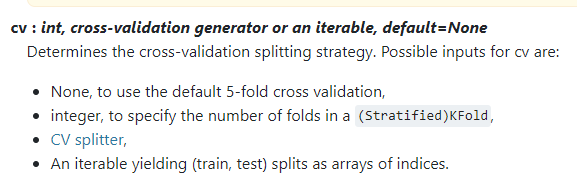

在ploynomial kernel中能發現三個參數的影響力排序明顯為 degree > gamma > coef0
此結果與公式相符。

RBF中，gamma的影響程度也隨著gamma的值指數下降，此結果與公式相符。